W207: Final Project
===========

Our team (Danish Iqbal, KC Tobin, Jason Vantomme) is working through the Kaggle "House Prices: Advanced Regression Techniques" competition @ https://www.kaggle.com/c/house-prices-advanced-regression-techniques.

Our first step is to scrub the data and generate effective features from what is provided.  We have divided this process into three parts, one for each team member.

In [38]:
# ENVIRONMENT SETUP

# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

import datetime
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn import linear_model as lm
from sklearn import preprocessing
from sklearn import metrics

import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None) 

In [ ]:
# We start of with 86 different features and 1460 training observations and roughly the same amount of observations 
# for testing. 
# This shows how the distribution of our data and our logic for creating more variables or transforming existing variables.


In [2]:
# LOAD THE PROVIDED TRAINING DATA AND DO BASIC ASSESSMENTS
original_train_data = pd.read_csv('data/train.csv',delimiter=',',header=0)
print original_train_data.describe()

                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000

In [33]:
# Find missing values, types , and value counts for each column that is not continous. This will help with
# picking dummy values and thresholds for splitting variables
columns = original_train_data.loc[:]
for i in columns:
    if (original_train_data[i].dtype != 'float64'):
        print '---- ', i,'-----'
        print 'Missing values: ', original_train_data[i].isnull().sum()
        print 'is of type: ', original_train_data[i].dtype
        print original_train_data[i].value_counts()

----  Id -----
Missing values:  0
is of type:  int64
1460    1
479     1
481     1
482     1
483     1
484     1
485     1
486     1
487     1
488     1
489     1
490     1
491     1
492     1
493     1
494     1
495     1
496     1
497     1
498     1
499     1
480     1
478     1
501     1
477     1
458     1
459     1
460     1
461     1
462     1
       ..
996     1
997     1
998     1
999     1
1000    1
1001    1
1002    1
983     1
982     1
981     1
970     1
962     1
963     1
964     1
965     1
966     1
967     1
968     1
969     1
971     1
980     1
972     1
973     1
974     1
975     1
976     1
977     1
978     1
979     1
1       1
Name: Id, dtype: int64
----  MSSubClass -----
Missing values:  0
is of type:  int64
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64
----  MSZoning -----
Missing values:  0
is of type:  obje

In [3]:
# CONTINUE ASSESSMENTS; ANY STRONG CORRELATIONS BETWEEN FEATURES?
corr = original_train_data.corr()
print corr
#features highly correlated to SalePrice include and are of interest:
#OverallQual, YearBuilt, 1stFlrSF, GrLivArea, FullBath, GarageCars

                     Id  MSSubClass  LotFrontage   LotArea  OverallQual  \
Id             1.000000    0.011156    -0.010601 -0.033226    -0.028365   
MSSubClass     0.011156    1.000000    -0.386347 -0.139781     0.032628   
LotFrontage   -0.010601   -0.386347     1.000000  0.426095     0.251646   
LotArea       -0.033226   -0.139781     0.426095  1.000000     0.105806   
OverallQual   -0.028365    0.032628     0.251646  0.105806     1.000000   
OverallCond    0.012609   -0.059316    -0.059213 -0.005636    -0.091932   
YearBuilt     -0.012713    0.027850     0.123349  0.014228     0.572323   
YearRemodAdd  -0.021998    0.040581     0.088866  0.013788     0.550684   
MasVnrArea    -0.050298    0.022936     0.193458  0.104160     0.411876   
BsmtFinSF1    -0.005024   -0.069836     0.233633  0.214103     0.239666   
BsmtFinSF2    -0.005968   -0.065649     0.049900  0.111170    -0.059119   
BsmtUnfSF     -0.007940   -0.140759     0.132644 -0.002618     0.308159   
TotalBsmtSF   -0.015415  

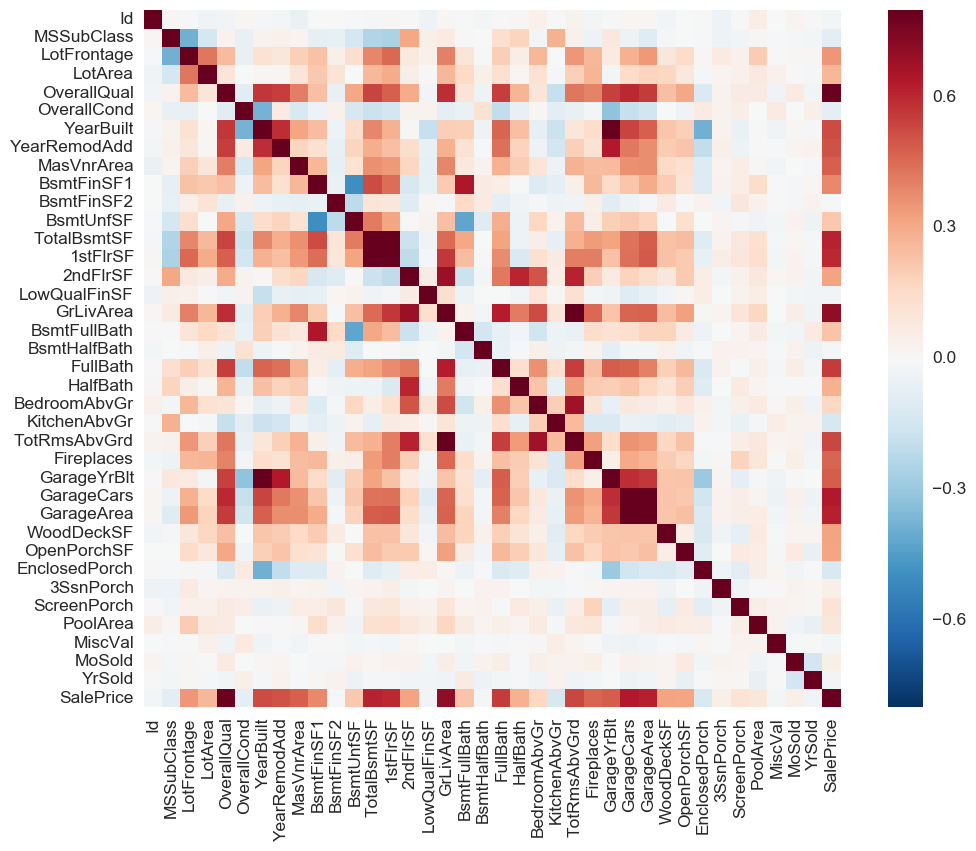

In [24]:
#creating correlation matrix for better visibiilty of plots
corrmat = original_train_data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [ ]:
#features highly correlated to SalePrice include and are of interest:
#OverallQual, YearBuilt, 1stFlrSF, GrLivArea, FullBath, GarageCars

(array([   0.,    0.,    0.,    4.,    1.,    6.,   11.,   13.,   44.,
          35.,   61.,   87.,  103.,  124.,  126.,   88.,   81.,  102.,
          78.,   61.,   50.,   45.,   43.,   46.,   26.,   28.,   27.,
          26.,   18.,   11.,   10.,   20.,   14.,    8.,    7.,    4.,
           4.,    8.,    6.,    6.,    3.,    3.,    3.,    3.,    2.,
           1.,    2.,    1.,    1.,    0.,    1.,    0.,    0.,    1.,
           0.,    2.,    0.,    0.,    1.,    0.,    0.,    1.,    1.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    1.,    1.,    0.,    0.,    0.]),
 array([     0,  10000,  20000,  30000,  40000,  50000,  60000,  70000,
         80000,  90000, 100000, 110000, 120000, 130000, 140000, 150000,
        160000, 170000, 180000, 190000, 200000, 210000, 220000, 230000,
        240000, 250000, 260000, 270000, 280000, 290000, 300000, 310000,
        320000, 330000, 340000, 350000, 360000, 370000, 380000, 390000,
        40000

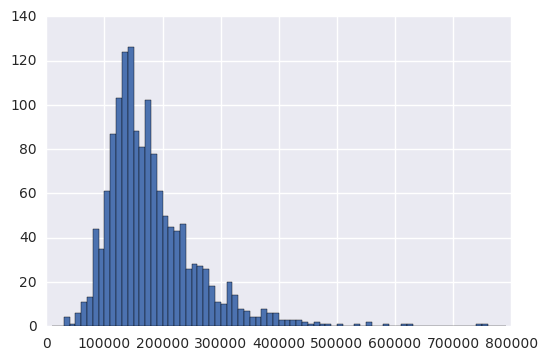

In [60]:
# plot dependent variable, sales prices to see how it's distributed. Then plot correlations w. highly correlated variables
plt.hist(original_train_data['SalePrice'], bins=range(0,800000, 10000))
#fairly normal distribution of SalesPrice variable



(array([   5.,   12.,   54.,  184.,  470.,  400.,  220.,   90.,   19.,    6.]),
 array([ 10.46024211,  10.7676652 ,  11.07508829,  11.38251138,
         11.68993448,  11.99735757,  12.30478066,  12.61220375,
         12.91962684,  13.22704994,  13.53447303]),
 <a list of 10 Patch objects>)

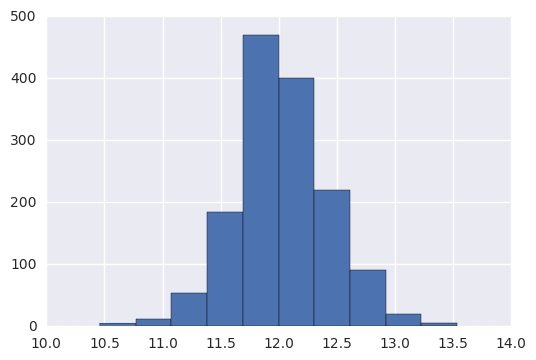

In [53]:
#log transformation further normalizes Sales price by containing the long right tale 
log_sales = np.log(original_train_data['SalePrice'])
plt.hist(log_sales)


(array([   2.,    3.,   20.,  116.,  397.,  374.,  319.,  168.,   43.,   18.]),
 array([  1. ,   1.9,   2.8,   3.7,   4.6,   5.5,   6.4,   7.3,   8.2,
          9.1,  10. ]),
 <a list of 10 Patch objects>)

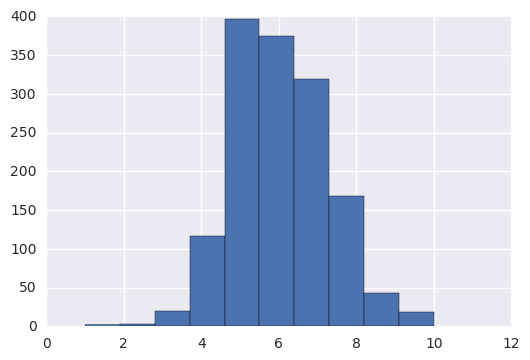

In [49]:
plt.hist(original_train_data['OverallQual'])


(array([  3.,   7.,   4.,   9.,   6.,   4.,   0.,   3.,   6.,   9.,   5.,
          4.,   8.,  18.,  15.,   2.,   0.,   0.,   6.,   7.,   5.,  14.,
         12.,  20.,   6.,   5.,  12.,  24.,  16.,  14.,  20.,  24.,  26.,
         17.,  14.,  19.,  16.,  15.,  24.,  18.,  16.,  22.,  14.,  24.,
         22.,  23.,  11.,  10.,   8.,  33.,  32.,  16.,   9.,  10.,   5.,
          6.,   4.,   9.,   5.,   5.,   3.,  11.,   3.,  12.,   5.,  13.,
         17.,  19.,  18.,  15.,  14.,  25.,  25.,  24.,  20.,  23.,  99.]),
 array([1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937,
        1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948,
        1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959,
        1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
        1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
        1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
        1993, 1994, 1995, 1996, 1997

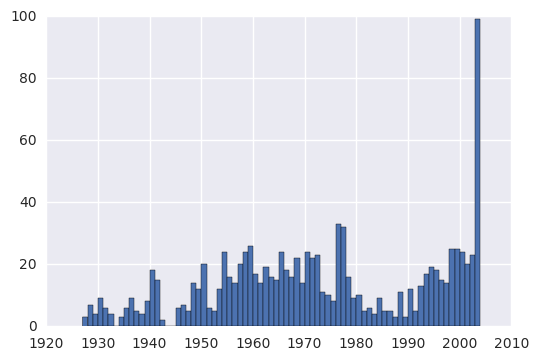

In [54]:
plt.hist(original_train_data['YearBuilt'], bins=range(1927,2005, 1))
# there seems to be a clustering around differnt decades


(array([   0.,    0.,    0.,    2.,   10.,   19.,   67.,  113.,  189.,
         184.,  173.,  136.,  111.,   97.,   83.,   72.,   76.,   45.,
          26.,   15.,   16.,    9.,    5.,    2.,    3.,    2.,    1.,
           0.,    1.]),
 array([   0,  100,  200,  300,  400,  500,  600,  700,  800,  900, 1000,
        1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100,
        2200, 2300, 2400, 2500, 2600, 2700, 2800, 2900]),
 <a list of 29 Patch objects>)

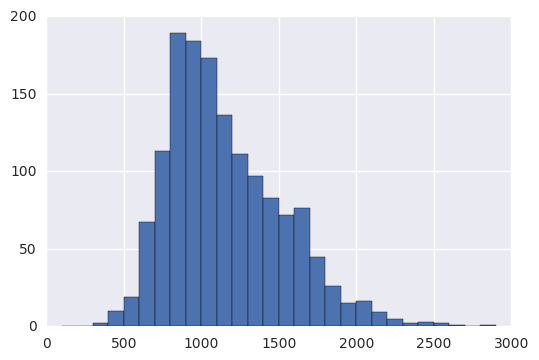

In [56]:
plt.hist(original_train_data['1stFlrSF'], bins=range(0,3000, 100) )

(array([   0.,    0.,    0.,    1.,    2.,    1.,   14.,   27.,   88.,
          98.,  100.,   95.,  114.,  122.,  120.,  108.,  121.,  105.,
          61.,   68.,   47.,   31.,   31.,   21.,   15.,   17.,   16.,
          10.,    7.,    2.,    2.,    3.,    4.,    1.,    2.,    0.,
           2.,    0.,    0.,    0.,    0.,    0.,    0.,    1.,    1.,
           0.,    1.,    0.,    0.]),
 array([   0,  100,  200,  300,  400,  500,  600,  700,  800,  900, 1000,
        1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100,
        2200, 2300, 2400, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200,
        3300, 3400, 3500, 3600, 3700, 3800, 3900, 4000, 4100, 4200, 4300,
        4400, 4500, 4600, 4700, 4800, 4900]),
 <a list of 49 Patch objects>)

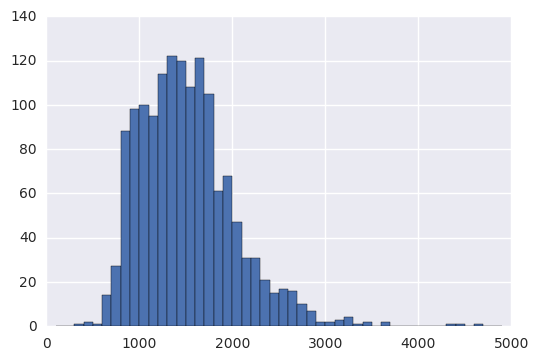

In [55]:
plt.hist(original_train_data['GrLivArea'], bins=range(0,5000, 100))

(array([   9.,    0.,    0.,  650.,    0.,    0.,  768.,    0.,    0.,   33.]),
 array([ 0. ,  0.3,  0.6,  0.9,  1.2,  1.5,  1.8,  2.1,  2.4,  2.7,  3. ]),
 <a list of 10 Patch objects>)

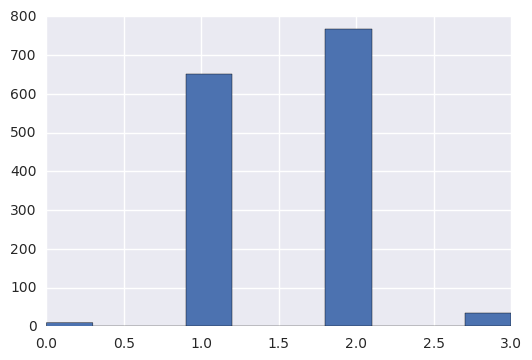

In [47]:
plt.hist(original_train_data['FullBath'])


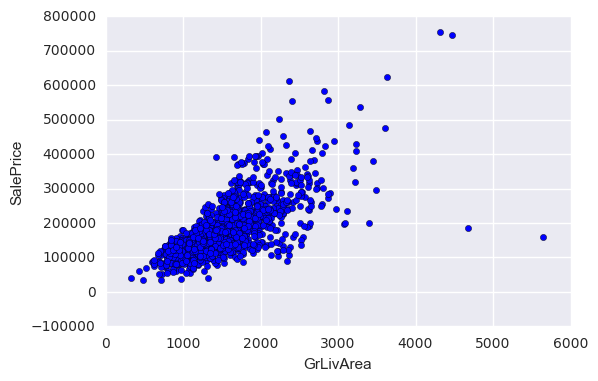

In [48]:
# Looking at strong correlations w/ Sales Price
plt.scatter(x=original_train_data['GrLivArea'], y=original_train_data['SalePrice'])
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')

# keep variable as continous. There are 2 outliers, but may be best to keep them or make thresholds of them 


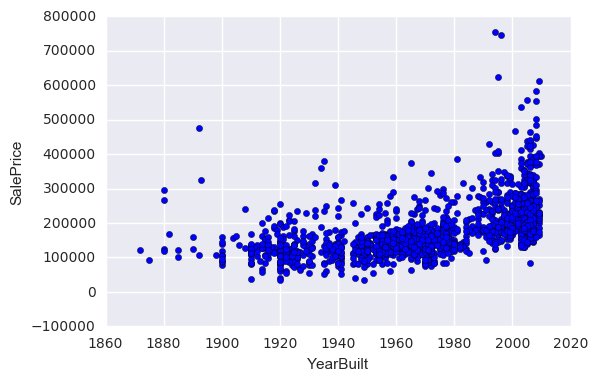

In [57]:
plt.scatter(x=original_train_data['YearBuilt'], y=original_train_data['SalePrice'])
plt.xlabel('YearBuilt')
plt.ylabel('SalePrice')
# split into decades as there seems to be some clustering around decades

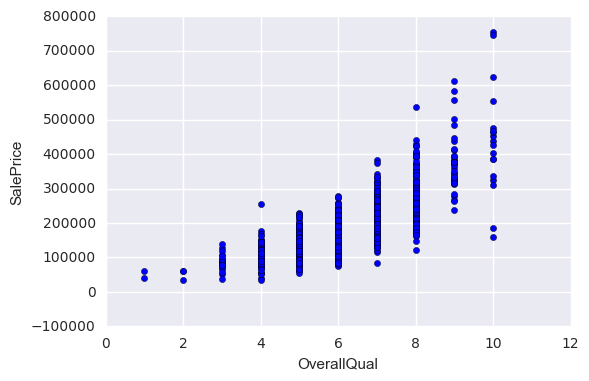

In [58]:
plt.scatter(x=original_train_data['OverallQual'], y=original_train_data['SalePrice'])
plt.xlabel('OverallQual')
plt.ylabel('SalePrice')
#overall positive trend, split into dummy variables for each.

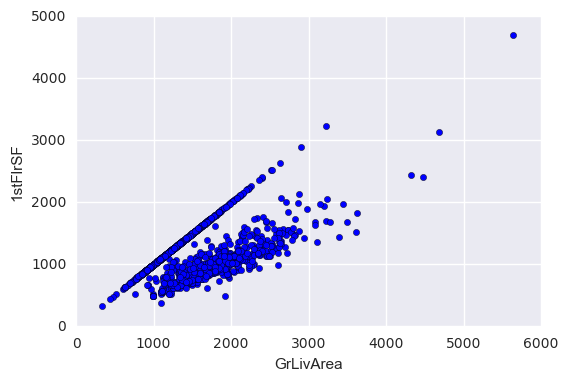

In [59]:
plt.scatter(x=original_train_data['GrLivArea'], y=original_train_data['1stFlrSF'])
plt.xlabel('GrLivArea')
plt.ylabel('1stFlrSF')
#there is high correlation between these two variables. Need to be careful when interperting result in a regression as 
#there is high multicollinearity between these two
#there is also high multicollinearity between GrLivArea and other living area variables such as basement area and 2ndFlrArea

In [39]:
# Plotting categorical variables to see what ranges to put them into 
#plt.hist(original_train_data['MSSubClass'], bins=range(20,190, 5)) #20, 60, 50, 120, 80, 160, 90, 30, 70, all else
#plt.hist(original_train_data['MSZoning'], bins=range(20,190, 5)) #
#original_train_data.LotFrontage.value_counts().plot(kind='bar') 
#plt.hist(original_train_data['LotFrontage'], bins=range(0,300, 10)) #None, below 50, 60, 70, 80, 90 and above
#original_train_data.HouseStyle.value_counts().plot(kind='bar')#1 story, 2 story, 1.5 finished, slevel, other
#plt.hist(original_train_data['LotArea'], bins=range(20,30000, 1000)) #below 5K, then 1K for each till 14K, then above 
#plt.hist(original_train_data['YearBuilt'], bins=range(1927,2005, 1)) # group by decade
#original_train_data.Neighborhood.value_counts().plot(kind='bar')# if below 20, then other
#original_train_data.Exterior1st.value_counts().plot(kind='bar')# vinly, hdbrd, mtlsd,wdsdng, plywood, other
#original_train_data.Exterior2nd.value_counts().plot(kind='bar')# same variable as exerioro1st
#plt.hist(original_train_data['YearBuilt'], bins=range(1927,2005, 1)) # group by decade
#plt.hist(original_train_data['YearRemodAdd'])# group by decade


In [ ]:
## Consolidation of variables. Jason will talk more about this in the Feature Engineering section up next. 
# 9 Basement variables were consolidated into one basement variables (whether there is a basement or not)
# Basement area variables were kept
